<a href="https://colab.research.google.com/github/afraniofilho/ML-Ciencia_dos_Materiais/blob/main/ML_Ciencia_dos_Materiais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar a biblioteca **PyMatGen**

In [1]:
!pip3 install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40.6 MB 1.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 66 kB 6.4 MB/s 
     |████████████████████████████████| 98 kB 8.6 MB/s 
     |████████████████████████████████| 109 kB 68.8 MB/s 
     |████████████████████████████████| 514 kB 62.3 MB/s 
     |████████████████████████████████| 546 kB 96.1 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841050 sha256=2688c10b896a33b4a71db7e7488afdb068c842ff164436a8d645bbb2ed7f61bb
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen


# Vamos utilizar a biblioteca para:
- abrir um arquivo CIF (Crystallographic Information File)
- Buscar por cristais que satisfaçam certas propriedades

In [2]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen

request = urlopen("https://raw.githubusercontent.com/afraniofilho/ML-Ciencia_dos_Materiais/main/mp-696128_computed.cif")
cifFile = request.read().decode('utf-8')
parser = CifParser.from_string(cifFile)

Com esse código importamos a classe **CifParser**. Assim podemos criar um novo objeto Python que representa a estrutura CIF do material, e então poderemos acessar as informações deste.

In [3]:
structure = parser.get_structures()
# Retorna uma lista das estruturas do objeto
# Vamos mostrar a única estrutura do objeto recebido
print(structure[0])

Full Formula (Li20 Ge2 P4 S24)
Reduced Formula: Li10Ge(PS6)2
abc   :   8.787646   8.787646  12.657546
angles:  90.000000  90.000000  90.000000
Sites (50)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Li    0.228698  0.27295   0.294563
  1  Li    0.771302  0.72705   0.294563
  2  Li    0.27295   0.771302  0.794563
  3  Li    0.72705   0.228698  0.794563
  4  Li    0.228698  0.72705   0.294563
  5  Li    0.771302  0.27295   0.294563
  6  Li    0.27295   0.228698  0.794563
  7  Li    0.72705   0.771302  0.794563
  8  Li    0         0         0.93973
  9  Li    0         0         0.43973
 10  Li    0.5       0.5       0.54802
 11  Li    0.5       0.5       0.04802
 12  Li    0.256318  0.724772  0.036663
 13  Li    0.743682  0.275228  0.036663
 14  Li    0.275228  0.256318  0.536663
 15  Li    0.724772  0.743682  0.536663
 16  Li    0.275228  0.743682  0.536663
 17  Li    0.724772  0.256318  0.536663
 18  Li    0.256318  0.275228  0.036663
 19  Li   

**Vamos acessar certas informações do objeto CIF:**



In [4]:
structure = structure[0]

print(structure.lattice)
print(structure.species)
print(structure.charge)
print(structure.cart_coords)
print(structure.atomic_numbers)
print(structure.distance_matrix)

8.787646 0.000000 0.000000
0.000000 8.787646 0.000000
0.000000 0.000000 12.657546
[Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Li, Element Ge, Element Ge, Element P, Element P, Element P, Element P, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S, Element S]
0.0
[[2.00971706e+00 2.39858798e+00 3.72844472e+00]
 [6.77792894e+00 6.38905802e+00 3.72844472e+00]
 [2.39858798e+00 6.77792894e+00 1.00572177e+01]
 [6.38905802e+00 2.00971706e+00 1.00572177e+01]
 [2.00971706e+00 6.38905802e+00 3.72844472e+00]
 [6.77792894e+00 2.39858798e+00 3.72844472e+00]
 [2.39858798e+00 2.00971706e+00 1.00572177e+01]
 [6.3

# Buscando **estruturas** de materiais usando a API:


In [5]:
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError

m = MPRester("DkkmvzSy6UcVxqLM")

**Pesquisar cristais em que o gap de energia (*band gap*) do material seja maior do que 6**


In [6]:
results = m.query({"band_gap": {"$gt": 6}},properties=["material_id"])

100%|██████████| 845/845 [00:00<00:00, 882.09it/s]


In [7]:
print(len(results))
results[0:10]

845


[{'material_id': 'mp-1001080'},
 {'material_id': 'mp-1004528'},
 {'material_id': 'mp-1017626'},
 {'material_id': 'mp-1019509'},
 {'material_id': 'mp-1019539'},
 {'material_id': 'mp-1019741'},
 {'material_id': 'mp-1019742'},
 {'material_id': 'mp-1019804'},
 {'material_id': 'mp-1020018'},
 {'material_id': 'mp-1020022'}]

**Pesquisar o cristal pelo código de identificação do Material (mp-xxxxx)**. Vamos pesquisar o mp-66


In [8]:
results=m.query({"material_id": 'mp-66'},properties=["cif"])
cifFile = results[0]['cif']
parser = CifParser.from_string(cifFile)

structure = parser.get_structures()
print(structure[0])

Full Formula (C2)
Reduced Formula: C
abc   :   2.526995   2.526995   2.526995
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  C     0.75  0.75  0.75
  1  C     0     0     0


# **Construir o dataset**

Para treinar o modelo de predição é necessário criar um dataset com várias estruturas de materiais e seus respectivos valores de **band gap**.
Para esse exercício vamos focar nos materiais com a forma ABC3 (estequiometria da perovskita)


In [9]:
results = m.query({"formula_anonymous": "ABC3"}, properties=["cif", "band_gap"])

100%|██████████| 4358/4358 [00:04<00:00, 1043.73it/s]


**Pré-processar os dados**

Extrair os dados necessários da estrutura, criar um Dataframe **Pandas** e aplicar a normalização.

In [10]:
from pymatgen.io.cif import CifParser
from urllib.request import urlopen
import pandas as pd
from pymatgen.ext.matproj import MPRester
from pymatgen.ext.matproj import MPRestError
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def descriptors(cif):

    atomic_numbers = []

    distance_matrix = []
    van_der_waals_radius = []
    electrical_resistivity = []
    velocity_of_sound = []
    reflectivity = []
    poissons_ratio = []
    molar_volume = []
    thermal_conductivity = []
    melting_point = []
    critical_temperature = []
    superconduction_temperature = []
    liquid_range = []
    bulk_modulus = []
    youngs_modulus = []
    brinell_hardness = []
    rigidity_modulus = []
    # mineral_hardness = []
    vickers_hardness = []
    density_of_solid = []
    coefficient_of_linear_thermal_expansion = []
    average_ionic_radius = []
    average_cationic_radius = []
    average_anionic_radius = []

    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    numElements = len(structure.atomic_numbers)

    num_metals = 0
    for e in structure.species:
        if e.Z in range(3, 4+1) or e.Z in range(11, 12+1) or e.Z in range(19, 30+1) or e.Z in range(37, 48+1) or e.Z in range(55, 80 + 1) or e.Z in range(87, 112+1):
            num_metals += 1
    metals_fraction = num_metals/numElements

    spg = structure.get_space_group_info()

    spacegroup_numbers = {}
    for i in range(1, 231):
        spacegroup_numbers[i] = 0

    spacegroup_numbers[spg[1]] = 1

    spacegroup_numbers_list = []
    for i in range(1, 231):
        spacegroup_numbers_list += [spacegroup_numbers[i]]

    atomic_numbers = [np.mean(structure.atomic_numbers), np.max(structure.atomic_numbers), np.min(
        structure.atomic_numbers), np.std(structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters = structure.lattice.abc[0]
    b_parameters = structure.lattice.abc[1]
    c_parameters = structure.lattice.abc[2]
    alpha_parameters = structure.lattice.angles[0]
    beta_parameters = structure.lattice.angles[1]
    gamma_parameters = structure.lattice.angles[2]

    distance_matrix += [np.mean(structure.distance_matrix), np.max(structure.distance_matrix),
                        np.min(structure.distance_matrix), np.std(structure.distance_matrix)]

    e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23 = [
    ], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
    for e in structure.species:
        e1 += [e.van_der_waals_radius]
        e2 += [e.electrical_resistivity]
        e3 += [e.velocity_of_sound]
        e4 += [e.reflectivity]
        e6 += [e.poissons_ratio]
        e7 += [e.molar_volume]
        e8 += [e.thermal_conductivity]
        e9 += [e.melting_point]
        e10 += [e.critical_temperature]
        e11 += [e.superconduction_temperature]
        e12 += [e.liquid_range]
        e13 += [e.bulk_modulus]
        e14 += [e.youngs_modulus]
        e15 += [e.brinell_hardness]
        e16 += [e.rigidity_modulus]
        # e17 +=[e.mineral_hardness ]
        e18 += [e.vickers_hardness]
        e19 += [e.density_of_solid]
        e20 += [e.coefficient_of_linear_thermal_expansion]
        e21 += [e.average_ionic_radius]
        e22 += [e.average_cationic_radius]
        e23 += [e.average_anionic_radius]

    e1 = [0 if v is None else v for v in e1]
    e2 = [0 if v is None else v for v in e2]
    e3 = [0 if v is None else v for v in e3]
    e4 = [0 if v is None else v for v in e4]
    # e5=[0 if v is None else v for v in e5]
    e6 = [0 if v is None else v for v in e6]
    e7 = [0 if v is None else v for v in e7]
    e8 = [0 if v is None else v for v in e8]
    e9 = [0 if v is None else v for v in e9]
    e10 = [0 if v is None else v for v in e10]
    e11 = [0 if v is None else v for v in e11]
    e12 = [0 if v is None else v for v in e12]
    e13 = [0 if v is None else v for v in e13]
    e14 = [0 if v is None else v for v in e14]
    e15 = [0 if v is None else v for v in e15]
    e16 = [0 if v is None else v for v in e16]
    # e17=[0 if v is None else v for v in e17]
    e18 = [0 if v is None else v for v in e18]
    e19 = [0 if v is None else v for v in e19]
    e20 = [0 if v is None else v for v in e20]
    e21 = [0 if v is None else v for v in e21]
    e22 = [0 if v is None else v for v in e22]
    e23 = [0 if v is None else v for v in e23]

    van_der_waals_radius = [np.mean(e1), np.max(e1), np.min(e1), np.std(e1)]
    electrical_resistivity = [np.mean(e2), np.max(e2), np.min(e2), np.std(e2)]
    velocity_of_sound = [np.mean(e3), np.max(e3), np.min(e3), np.std(e3)]
    reflectivity = [np.mean(e4), np.max(e4), np.min(e4), np.std(e4)]
    poissons_ratio = [np.mean(e6), np.max(e6), np.min(e6), np.std(e6)]
    molar_volume = [np.mean(e7), np.max(e7), np.min(e7), np.std(e7)]
    thermal_conductivity = [np.mean(e8), np.max(e8), np.min(e8), np.std(e8)]
    melting_point = [np.mean(e9), np.max(e9), np.min(e9), np.std(e9)]
    critical_temperature = [np.mean(e10), np.max(
        e10), np.min(e10), np.std(e10)]
    superconduction_temperature = [
        np.mean(e11), np.max(e11), np.min(e11), np.std(e11)]
    liquid_range = [np.mean(e12), np.max(e12), np.min(e12), np.std(e12)]
    bulk_modulus = [np.mean(e13), np.max(e13), np.min(e13), np.std(e13)]
    youngs_modulus = [np.mean(e14), np.max(e14), np.min(e14), np.std(e14)]
    brinell_hardness = [np.mean(e15), np.max(e15), np.min(e15), np.std(e15)]
    rigidity_modulus = [np.mean(e16), np.max(e16), np.min(e16), np.std(e16)]
    vickers_hardness = [np.mean(e18), np.max(e18), np.min(e18), np.std(e18)]
    density_of_solid = [np.mean(e19), np.max(e19), np.min(e19), np.std(e19)]
    coefficient_of_linear_thermal_expansion = [
        np.mean(e20), np.max(e20), np.min(e20), np.std(e20)]
    average_ionic_radius = [np.mean(e21), np.max(
        e21), np.min(e21), np.std(e21)]
    average_cationic_radius = [
        np.mean(e22), np.max(e22), np.min(e22), np.std(e22)]
    average_anionic_radius = [
        np.mean(e23), np.max(e23), np.min(e23), np.std(e23)]

    V = a_parameters*b_parameters*c_parameters
    Density = V / numElements

    descriptors_list = atomic_numbers +\
        [Density] +\
        [alpha_parameters] +\
        [beta_parameters] +\
        [gamma_parameters] +\
        [metals_fraction] +\
        distance_matrix +\
        van_der_waals_radius +\
        electrical_resistivity +\
        velocity_of_sound +\
        reflectivity +\
        poissons_ratio +\
        molar_volume +\
        thermal_conductivity +\
        melting_point +\
        critical_temperature +\
        superconduction_temperature +\
        liquid_range +\
        bulk_modulus +\
        youngs_modulus +\
        brinell_hardness +\
        rigidity_modulus +\
        vickers_hardness +\
        density_of_solid +\
        coefficient_of_linear_thermal_expansion +\
        average_ionic_radius +\
        average_cationic_radius +\
        average_anionic_radius +\
        spacegroup_numbers_list
    return descriptors_list


descriptors(cifFile)

[6.0,
 6,
 6,
 0.0,
 8.068316579849055,
 60.00000000000001,
 60.00000000000001,
 60.00000000000001,
 0.0,
 0.7737309099104733,
 1.5474618198209467,
 0.0,
 0.7737309099104733,
 1.7,
 1.7,
 1.7,
 0.0,
 1e-05,
 1e-05,
 1e-05,
 0.0,
 18350.0,
 18350.0,
 18350.0,
 0.0,
 27.0,
 27.0,
 27.0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 5.29,
 5.29,
 5.29,
 0.0,
 140.0,
 140.0,
 140.0,
 0.0,
 3800.0,
 3800.0,
 3800.0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 500.0,
 500.0,
 500.0,
 0.0,
 33.0,
 33.0,
 33.0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 0.0,
 2267.0,
 2267.0,
 2267.0,
 0.0,
 7.1e-06,
 7.1e-06,
 7.1e-06,
 0.0,
 0.3,
 0.3,
 0.3,
 0.0,
 0.3,
 0.3,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [11]:
results[0]

{'cif': "# generated using pymatgen\ndata_AlPt3C\n_symmetry_space_group_name_H-M   'P 1'\n_cell_length_a   4.18515000\n_cell_length_b   4.18515000\n_cell_length_c   4.18515000\n_cell_angle_alpha   90.00000000\n_cell_angle_beta   90.00000000\n_cell_angle_gamma   90.00000000\n_symmetry_Int_Tables_number   1\n_chemical_formula_structural   AlPt3C\n_chemical_formula_sum   'Al1 Pt3 C1'\n_cell_volume   73.30491331\n_cell_formula_units_Z   1\nloop_\n _symmetry_equiv_pos_site_id\n _symmetry_equiv_pos_as_xyz\n  1  'x, y, z'\nloop_\n _atom_site_type_symbol\n _atom_site_label\n _atom_site_symmetry_multiplicity\n _atom_site_fract_x\n _atom_site_fract_y\n _atom_site_fract_z\n _atom_site_occupancy\n  Al  Al0  1  0.00000000  0.00000000  0.00000000  1\n  Pt  Pt1  1  0.00000000  0.50000000  0.50000000  1\n  Pt  Pt2  1  0.50000000  0.00000000  0.50000000  1\n  Pt  Pt3  1  0.50000000  0.50000000  0.00000000  1\n  C  C4  1  0.50000000  0.50000000  0.50000000  1\n",
 'band_gap': 0.0}

Agora vamos iterar na lista resultante e extrair os descritores da lista acima. **Esse processo levará alguns minutos.**




In [12]:
band_gaps = []
dataset = []

counter =0
for r in results:
    cif = r['cif']
    bg = r['band_gap']
    parser = CifParser.from_string(cif)

    structure = parser.get_structures()
    structure = structure[0]

    dataset += [descriptors(cif)]

    band_gaps += [bg]
    print(counter)
    counter +=1

dataset_df = pd.DataFrame(dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


/usr/local/lib/python3.7/dist-packages/pymatgen/io/cif.py:1164: UserWarning: Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.
  warnings.warn("Issues encountered while parsing CIF: %s" % "\n".join(self.warnings))


51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
3

Após criar o dataset, é uma boa prática verficar o resultado para confirmar se foi tudo criado corretamente.
Vamos tambem utilizar a biblioteca **Matplotlib** para criar um histograma dos valores do band gap.

In [13]:
dataset_df.head()

,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,326
0,50.6,78,6,33.630938,14.660983,90.000000,90.000000,90.000000,0.6,2.212661,...,1,0,0,0,0,0,0,0,0,0
1,48.4,82,1,26.226704,48.692618,90.000000,90.000000,90.000000,0.0,3.301273,...,1,0,0,0,0,0,0,0,0,0
2,41.8,66,5,19.963968,16.119510,90.000000,90.000000,90.000000,0.8,2.283728,...,1,0,0,0,0,0,0,0,0,0
3,22.6,63,8,21.369137,16.756528,60.490967,60.167456,60.167456,0.4,2.370456,...,0,0,0,0,0,0,0,0,0,0
4,40.8,83,7,24.276738,48.360873,90.000000,90.000000,90.000000,0.6,3.293759,...,1,0,0,0,0,0,0,0,0,0


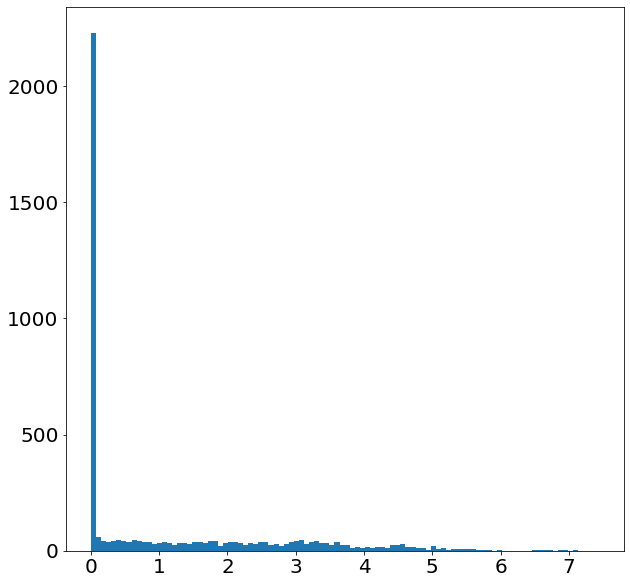

In [14]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

O histograma mostra que aproximadamente a metade dos dados do nosso dataset são metais (energia de banda = 0 eV). 
Agora vamos criar um gráfico de dispersão.
Condutores = 0 eV,
Semicondutores < 4 eV (cerca de 1 eV),
Isolantes > 10 eV

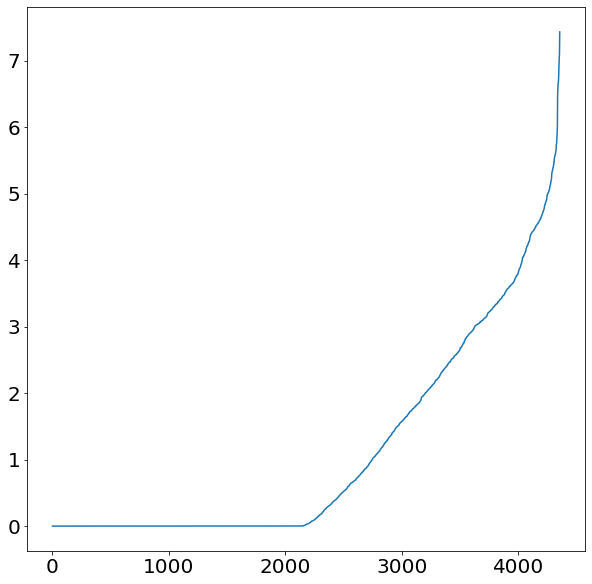

In [15]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')

Vamos agora dividir o nosso dataset para o treinamento e teste do modelo de aprendizado (proporção de 80/20).
Para isso vamos utilizar a biblioteca scikit-learn [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/) para preparar e executar o treinamento.


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset_df, band_gaps, test_size=.2, random_state=None)

**Normalização dos dados**

In [17]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

# Scale the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Next, we create a pandas DataFrame object

## Executando o aprendizado de máquina

Vamos utilizar três modelos de aprendizado: Gradient Boosting Regressor, Random Forest e eXtreme Gradient Boosting.
Avaliar a acurácia do modelo usando **erro absoluto médio** (EAM), **erro quadrático médio** (EQM)   o **coeficiente de regressão** (R2) e o 
[Métricos SciKit Learn](https://scikit-learn.org/stable/modules/model_evaluation.html)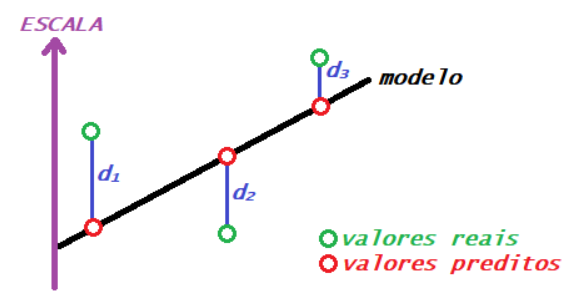

Gradient Boosting Regressor

O erro absoluto médio é : 0.9400
O erro quadrático médio é : 1.4965
O coeficiente de regressão R2 é : 0.4008


Random Forest Regressor

O erro absoluto médio é : 0.5328
O erro quadrático médio é : 0.7269
O coeficiente de regressão R2 é : 0.7090


eXtreme Gradient Boosting/n
O erro absoluto médio é : 0.4958
O erro quadrático médio é : 0.7082
O coeficiente de regressão R2 é : 0.7164




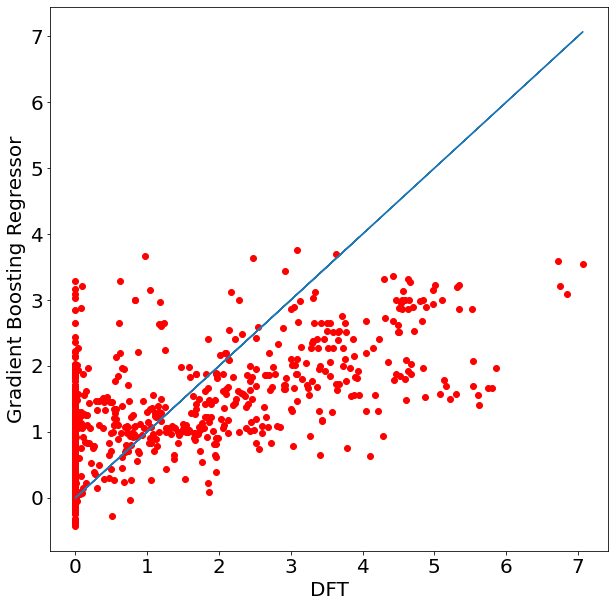

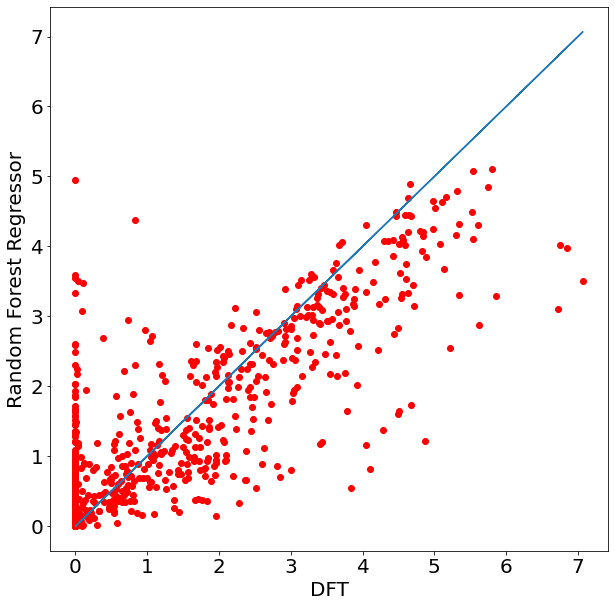

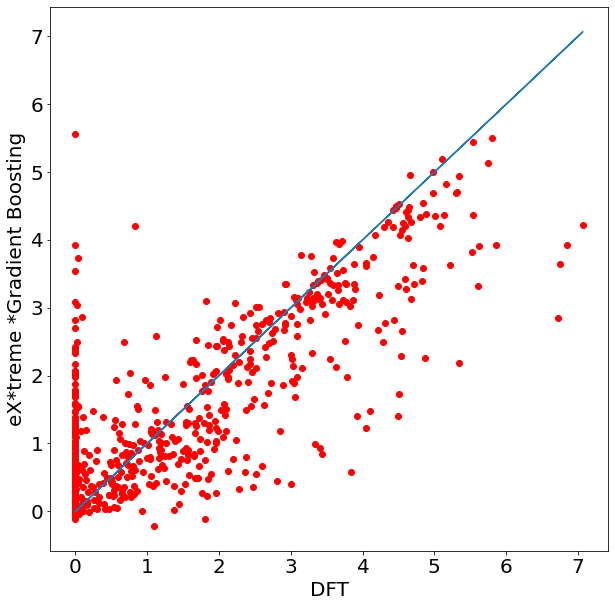

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,loss='squared_error').fit(X_train_scaled, y_train)
y_predicted = est.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_predicted)
msa = mean_absolute_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print("Gradient Boosting Regressor\n")
print("O erro absoluto médio é : {:.4f}".format(msa))
print("O erro quadrático médio é : {:.4f}".format(mse))
print("O coeficiente de regressão R2 é : {:.4f}".format(r2))
print("\n")

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('Gradient Boosting Regressor')
plt.xlabel('DFT')
plt.savefig('GBR_Correlation_Test', bbox_inches='tight')


regr = RandomForestRegressor(n_estimators=400, max_depth=400, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print("Random Forest Regressor\n")
msa = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print("O erro absoluto médio é : {:.4f}".format(msa))
print("O erro quadrático médio é : {:.4f}".format(mse))
print("O coeficiente de regressão R2 é : {:.4f}".format(r2))
print("\n")

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('Random Forest Regressor')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')


regr = XGBRegressor(objective='reg:squarederror', max_depth=10, n_estimators=400)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print("eXtreme Gradient Boosting/n")
msa = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print("O erro absoluto médio é : {:.4f}".format(msa))
print("O erro quadrático médio é : {:.4f}".format(mse))
print("O coeficiente de regressão R2 é : {:.4f}".format(r2))
print("\n")

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('eX*treme *Gradient Boosting')
plt.xlabel('DFT')
plt.savefig('XGBOOST_Correlation_Test', bbox_inches='tight')

**Obtivemos R2 > 0.71 e EMA < 0.5. É um bom resultado mas pode ser aprimorado com um melhor tratamento dos dados e uso de outros modelos de predição para o band gap e outras características.**